# TC.L.ITF.1.2.1.1 Antenna-apex Receiver.  

# Version: 09Aug2023 

* AAVS3 type LNA + 8-m cable of type LMR195 
* Integrate LNA to its RF cable and test 

    (1) Gain of the assembly, 
    
    (2) Provide noise from SSG corresponding approximately to total power from antenna at Galactic Centre transit, and test change in response of assembled system when noise source is switched ON/OFF


In [ ]:
# pragma pylint: disable=line-too-long
# pragma pylint: disable=unnecessary-lambda
# pragma pylint: disable=unnecessary-lambda-assignment

In [2]:
import csv

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants

PI = np.pi
KB = scipy.constants.k

# Define path where .csv files are stored
PATH = (
    "/Users/sub005/Desktop/SKA_LOW/AIV/ITF Tests/LNA_RFcable_Integration_TC_09Aug2023/"
)

# Define physical temperature of the 40 dB attenuator at LNA module input
Tatten = 273.15 + 21  # kelvin

In [3]:
# Return coefficients of a polynomial fit to data

func_poly = lambda p, x: (np.polyval(p, x))

In [4]:
# Define function to return numpy arrays of frequency and power from csv recordings of SA
# frequency in MHz; power in dBm/MHz


def get_frequency_spectrum(INFILE):
    sflag = 0
    freq = []
    Pdb0 = []
    with open(INFILE) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row != []:
                if sflag == 1 and row[0] != "END":
                    freq.append(float(row[0]) / 1e6)
                    Pdb0.append(float(row[1]))
                if row[0] == "BEGIN":
                    sflag = 1

    freq = np.array(freq, dtype=np.float32)
    Pdb0 = np.array(Pdb0, dtype=np.float32)

    return (freq, Pdb0)

In [7]:
# Computations of the expected powers at SA
# assuming that:
#
# Power at input of LNA modules is set to be -106.9 dBm/MHz at band centre - at 200 MHz.
# The sky signal generator output power has a slope across the Low band of 2 dB,
# due to active and passive components, notably amplifier, directional coupler, cables, attenuators, connectors.
#
# LNA gain might be in the range 40 to 45 dB
# Receiver noise might be in range 40 to 70 K
# LMR195 cable has loss of 0.8 to 2.2 dB across the Low band and the bias tee is another 0.6 dB loss


Tsys_on_array = []
Tsys_off_array = []
Pout_on_dBm_array = []
Pout_off_dBm_array = []
Delta_Pout = []
GG_array = []

for TR in [40.0, 70.0]:
    for Tssg in [-105.9, -106.9, -107.9]:
        for GG0 in [40.0, 45.0]:
            for Closs in [-0.7, 0.7]:
                GG = GG0 - (1.9 + Closs) - 0.6
                GG_array.append(GG)

                Tssg_kelvin = ((10.0 ** (Tssg / 10.0)) / 1000.0) / (KB * 1e6)

                Tsys_on = Tssg_kelvin + Tatten + TR
                Tsys_off = Tatten + TR

                Tsys_on_dBm = 10.0 * np.log10(1.38e-23 * 1e6 * Tsys_on * 1e3)
                Tsys_off_dBm = 10.0 * np.log10(1.38e-23 * 1e6 * Tsys_off * 1e3)

                Pout_on = Tsys_on_dBm + GG
                Pout_off = Tsys_off_dBm + GG

                Tsys_on_array.append(Tsys_on_dBm)
                Tsys_off_array.append(Tsys_off_dBm)
                Pout_on_dBm_array.append(Pout_on)
                Pout_off_dBm_array.append(Pout_off)
                Delta_Pout.append(Pout_on - Pout_off)

print("Min/Max Gain (dB): ", np.min(GG_array), np.max(GG_array))

print(
    "\nMin/Max in Tsys on (dBm):  ",
    np.min(Tsys_on_array),
    np.max(Tsys_on_array),
)
print(
    "Min/Max in Tsys off (dBm): ",
    np.min(Tsys_off_array),
    np.max(Tsys_off_array),
)

print(
    "\nMin/Max in Pout on (dBm):  ",
    np.min(Pout_on_dBm_array),
    np.max(Pout_on_dBm_array),
)
print(
    "Min/Max in Pout off (dBm): ",
    np.min(Pout_off_dBm_array),
    np.max(Pout_off_dBm_array),
)

print(
    "\nMin/Max in step change in output (dB): ",
    np.min(Delta_Pout),
    np.max(Delta_Pout),
)

Min/Max Gain (dB):  36.8 43.199999999999996

Min/Max in Tsys on (dBm):   -106.81482827522063 -105.12619149374531
Min/Max in Tsys off (dBm):  -113.3617944813905 -112.98840599308475

Min/Max in Pout on (dBm):   -70.01482827522064 -61.926191493745314
Min/Max in Pout off (dBm):  -76.5617944813905 -69.78840599308475

Min/Max in step change in output (dB):  6.259081490480071 8.176671549207512


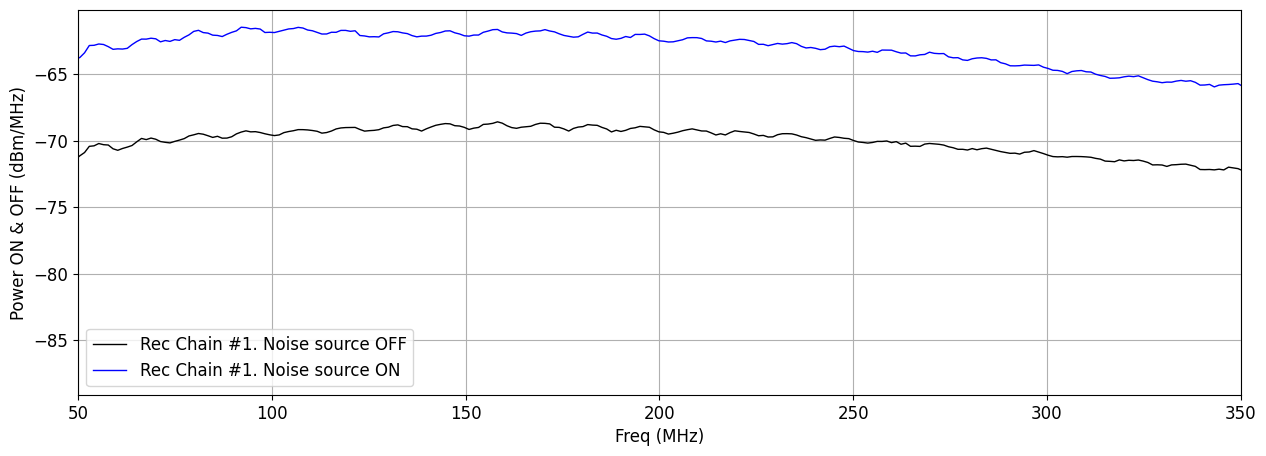

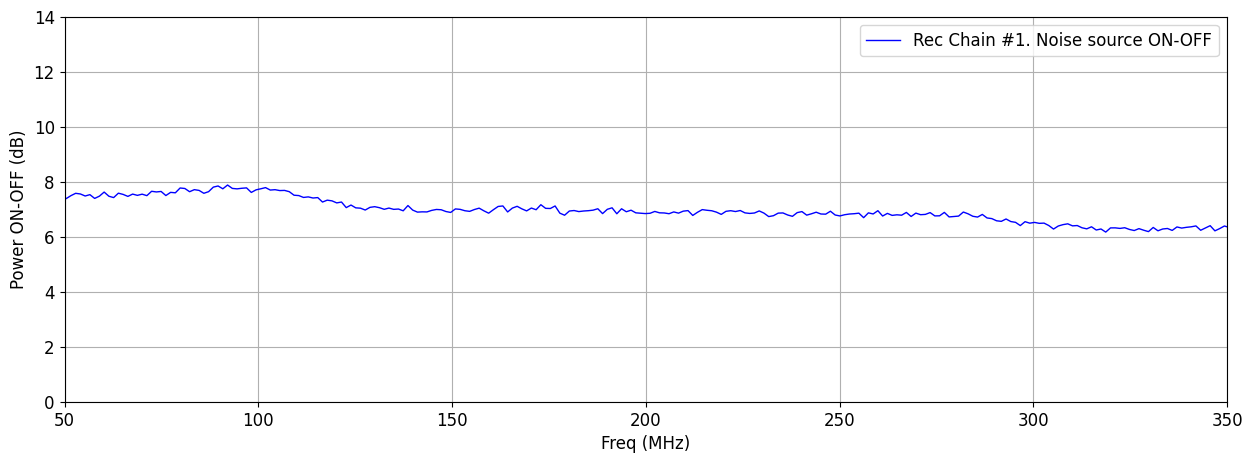

In [11]:
# Read in and plot the SA record with receiver chain #1 connected; noise source off, then noise source on.

plt.figure(figsize=[15, 5])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

INFILE = "TC1_ch1_noise_off.csv"
freq, PdbmOFF = get_frequency_spectrum(PATH + INFILE)
INFILE = "TC1_ch1_noise_on.csv"
freq, PdbmON = get_frequency_spectrum(PATH + INFILE)
ax1.plot((freq), PdbmOFF, "k-", linewidth=1, label="Rec Chain #1. Noise source OFF")
ax1.plot((freq), PdbmON, "b-", linewidth=1, label="Rec Chain #1. Noise source ON")
plt.ylabel("Power ON & OFF (dBm/MHz)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
# plt.ylim([-80,-60])
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure(figsize=[15, 5])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

ax1.plot(
    (freq),
    PdbmON - PdbmOFF,
    "b-",
    linewidth=1,
    label="Rec Chain #1. Noise source ON-OFF",
)

plt.ylabel("Power ON-OFF (dB)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
plt.ylim([0, 14])
plt.legend(loc="best")
plt.grid()
plt.show()

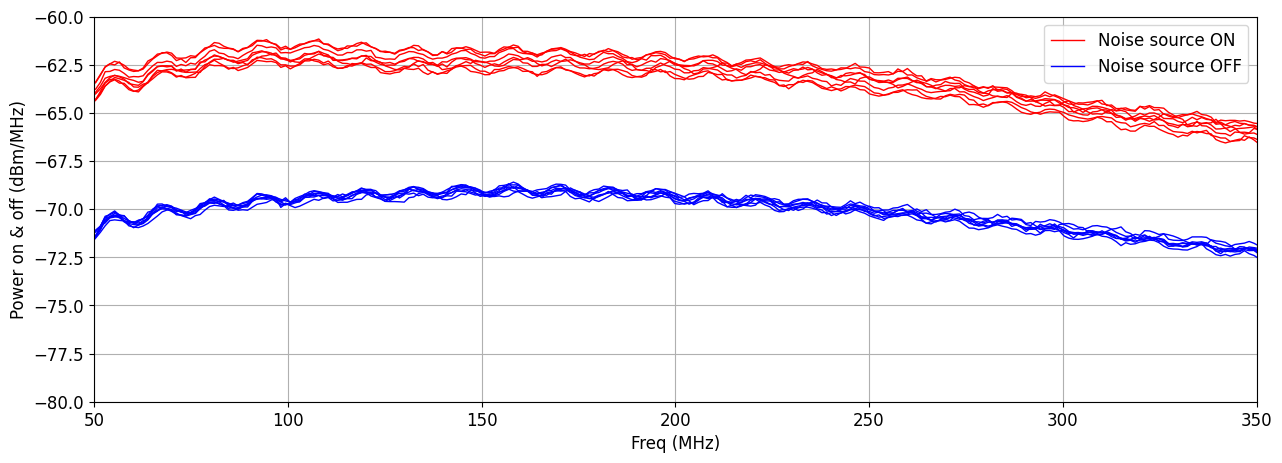

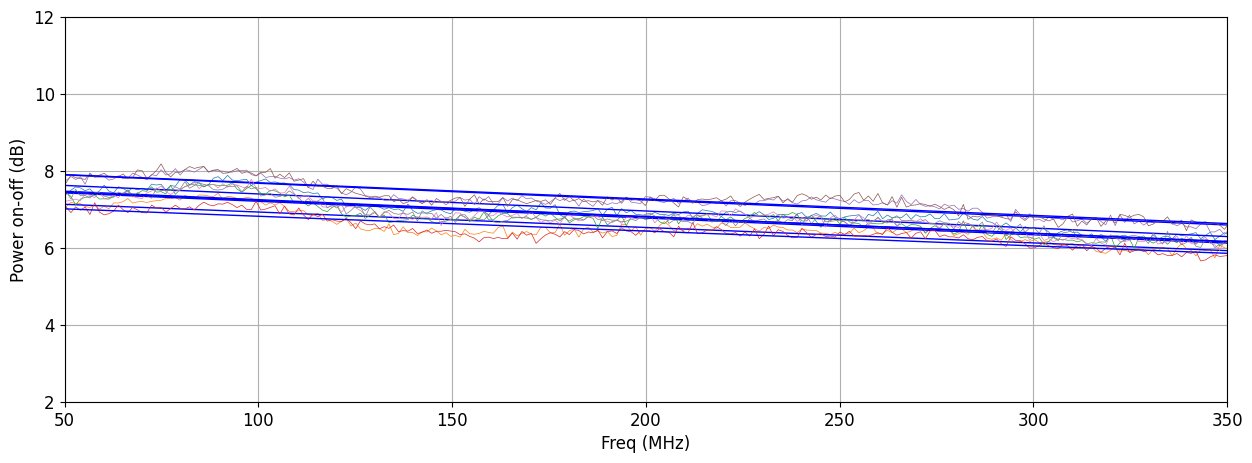

In [19]:
# Read in and plot SA records with noise source off and on

plt.figure(figsize=[15, 5])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

Pdbm_on = []
Pdbm_off = []
for i in range(1, 9):
    INFILE = "TC1_ch" + str(i) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    Pdbm_on.append(Pdbm)
    INFILE = "TC1_ch" + str(i) + "_noise_off.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    Pdbm_off.append(Pdbm)

    if i == 1:
        ax1.plot((freq), Pdbm_on[-1], "r-", linewidth=1, label="Noise source ON")
    if i == 1:
        ax1.plot((freq), Pdbm_off[-1], "b-", linewidth=1, label="Noise source OFF")
    if i > 1:
        ax1.plot((freq), Pdbm_on[-1], "r-", linewidth=1)
    if i > 1:
        ax1.plot((freq), Pdbm_off[-1], "b-", linewidth=1)

plt.ylabel("Power on & off (dBm/MHz)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
plt.ylim([-80, -60])
plt.legend(loc="best")
plt.grid()
plt.show()

# SA is set to record 10 to 500 MHz
# Fits are done in the band
flow = 40.0
fhigh = 360.0
# corresdonding index range
ilow = np.argmin(np.abs(freq - flow))
ihigh = np.argmin(np.abs(freq - fhigh))

plt.figure(figsize=[15, 5])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
for i in range(8):
    ax1.plot((freq), Pdbm_on[i] - Pdbm_off[i], "-", linewidth=0.5)
    norder = 1
    zz = np.polyfit(
        freq[ilow : ihigh + 1],
        (Pdbm_on[i] - Pdbm_off[i])[ilow : ihigh + 1],
        norder,
    )
    ax1.plot(
        (freq[ilow : ihigh + 1]),
        func_poly(zz, freq[ilow : ihigh + 1]),
        "b-",
        linewidth=1,
    )

plt.ylabel("Power on-off (dB)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
plt.ylim([2, 12])
plt.grid()
plt.show()

# Success in Integration is expected to show SA spectral power 

* exceeding -77 dBm/MHz when the noise source is off
* and a step of 6-8 dB when noise source is switched on
for all eight assemblies of LNA plus 8-m cables integrated.